<a href="https://colab.research.google.com/github/6760525/DST-MATH-7/blob/main/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

email_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/3d8cb71ded70aa8810ac73aa43e85eac/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/spam_or_not_spam.zip', header=0, sep=',')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [2]:
email_data['label'].value_counts(normalize=True)

0    0.833333
1    0.166667
Name: label, dtype: float64

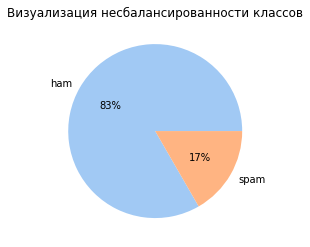

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

data = email_data['label'].value_counts(normalize=True)
labels = ['ham', 'spam']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Визуализация несбалансированности классов')
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
#Пустых строк в данных нет
email_data = email_data.dropna()

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
print(f'После предобработки данных получилось {X.shape[1]} признаков')

После предобработки данных получилось 34116 признаков


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
X = X.toarray()
y = email_data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
print(f'Среднее значение целевой переменной для тестовой выборки: {y_test.mean()} ')

Среднее значение целевой переменной для тестовой выборки: 0.164 


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [13]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB

mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

cnb = ComplementNB(alpha=0.01)
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, RocCurveDisplay

print(f'MultinomialNB {accuracy_score(y_test, y_pred_mnb):.3f}')
print(f'MultinomialNB {precision_score(y_test, y_pred_mnb):.3f}')
print(f'MultinomialNB {recall_score(y_test, y_pred_mnb):.3f}')
print("-"*20)
print(f'ComplementNB {accuracy_score(y_test, y_pred_cnb):.3f}')
print(f'ComplementNB {precision_score(y_test, y_pred_cnb):.3f}')
print(f'ComplementNB {recall_score(y_test, y_pred_cnb):.3f}')

MultinomialNB 0.996
MultinomialNB 0.992
MultinomialNB 0.984
--------------------
ComplementNB 0.995
ComplementNB 0.984
ComplementNB 0.984


Нарисуйте ROC-кривую:

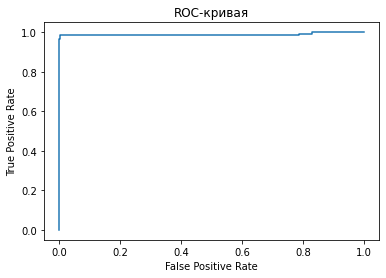

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, cnb.predict_proba(X_test)[:,1])

display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.title('ROC-кривая')
plt.show() 

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [16]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.00, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.20, 1.00, 10.00]}

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5)
complement_nb_grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

Train Accuracy : 0.996
Test Accuracy : 0.996
Best Accuracy Through Grid Search : 0.991
Best Parameters :  {'alpha': 0.14}


**Качество классификации зависит от параметра аддитивного сглаживания $\alpha$ усовершенствованого  полиномиального наивного байесовского алгоритма. Тем не менее, в данной задаче, лучшее значение параметра не позволило существенно улучшить качество модели.**